In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [60]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [61]:
y = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)

merge the data

In [62]:
data = pd.concat([train, test], axis=0)

In [63]:
data.shape

(981, 12)

Loan_ID has no predictive power. Removing it

In [64]:
data.drop('Loan_ID', axis=1, inplace=True)

In [65]:
data.shape

(981, 11)

In [66]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


Lets check the frequency of null value in each column.

In [67]:
n_nan = []
for col in data.columns:
    n_nan.append(data[col].isnull().sum())

[24, 3, 25, 0, 55, 0, 0, 27, 20, 79, 0]

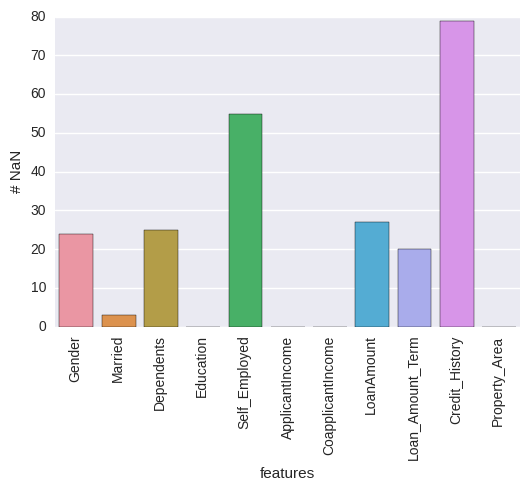

In [68]:
plt.xticks(rotation=90)
g = sns.barplot(x=data.columns, y=n_nan)
g.set(xlabel='features', ylabel='# NaN')
n_nan

It seems, data imputation will play a crucial part in this problem. We will use the following method for feature imputation now.

In [69]:
def impute(data):
	for col in data.columns:		
		data[col] = data[col].fillna('empty') if data[col].dtype == 'object' \
					else data[col].fillna(data[col].mean())
	return data

Lets replace the string of target column

In [70]:
mp = {'Y': 1, 'N': 0}
y = y.map(mp)

In [71]:
data = impute(data)	

In [72]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban


There are some categorical data in the data frame. We will perform One Hot Encoding in get_dummies() method.

In [73]:
data = pd.get_dummies(data)
feature_names = data.columns.values

In [74]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,Married_empty,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2583,2358.0,120.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.00000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's scale the data.

In [75]:
scaler = preprocessing.MinMaxScaler().fit(data)
data = scaler.transform(data)

In [76]:
test_id = test.Loan_ID

In [77]:
X = data[:train.shape[0]]
test = data[train.shape[0]:]

In [78]:
test

array([[ 0.07061728,  0.        ,  0.14616498, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03797531,  0.03599971,  0.16931983, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.0617284 ,  0.04319965,  0.28798842, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.04012346,  0.04783162,  0.16931983, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0617284 ,  0.05743154,  0.21562952, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11358025,  0.        ,  0.12879884, ...,  1.        ,
         0.        ,  0.        ]])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will use gradient boosted classifier as classification algorithm. It will help to get importances of each feature

In [91]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=6, random_state=1971)

In [92]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=1971,
              subsample=1.0, verbose=0, warm_start=False)

In [93]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print accuracy

0.756097560976


Ok, We've got 74% accuracy.
Let's see how important each feature is.

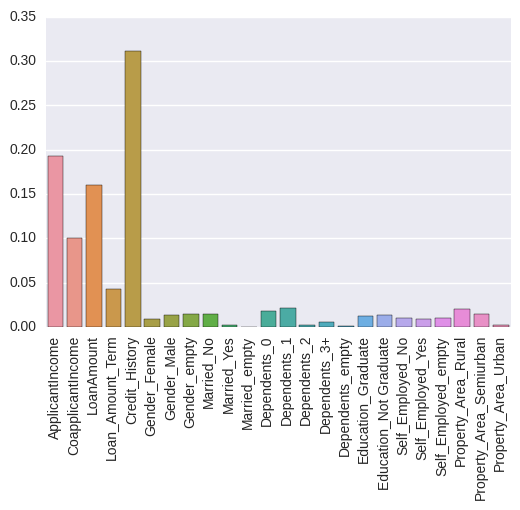

In [94]:
plt.xticks(rotation=90)
g = sns.barplot(x=feature_names, y=clf.feature_importances_)